In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import pandas_datareader as pdr
import datetime as dt
from datetime import timedelta
#os.getenv('TIINGO_API_KEY')
apikey='27590b851a7a6fc324e5f84bdf176dcec9476cfc'

In [51]:
#%store -r stats
%store -r goodboys


In [52]:
dfv = pd.read_excel('is20210222.xls')
print('# of Stocks to screen:',len(dfv))
dfv.head(3)

# of Stocks to screen: 1269


,Symbol,Market,Neural Index Trend\nDirection,Neural Index Trend\nDays,pDir,%Gain,Volume Trend\nDirection,Volume Trend\nDays,Volume%Avg,pHigh,pLow,High,Low,Close,Volume,Predicted\nHigh Diff,Predicted\nLow Diff
0,AAPL,Apple,down,7,both,0.123343,down,2,11.760000,131.159668,127.858307,130.710007,128.800003,129.869995,87668800,0.449661,-0.941696
1,PBR,Petroleo Brasileiro,down,5,none,-7.116447,up,4,121.629997,10.272124,10.030825,10.400000,9.930100,10.050000,74804496,-0.127875,0.100724
2,DNN,Denison Mines,down,2,down,-5.511806,down,3,-30.940001,1.275439,1.136781,1.320000,1.150000,1.200000,61979100,-0.044561,-0.013219


In [84]:
prd=pd.DataFrame()
dfv.fillna(0)
prd['Symbol']=dfv['Symbol']
dire = {'up': 1,'down': -1, 'nan':0,'data':0,'none':3,'both':2,'flat':4} #none= narrow sideways, both=wide sideways
prd['NI'] = [dire[str(x)] for x in dfv['Neural Index Trend\nDirection']] 
prd['volTrend']= [dire[str(x)] for x in dfv['Volume Trend\nDirection']] 
prd['pDir']= [dire[str(x)] for x in dfv['pDir']] 
prd['%Gain']=dfv['%Gain']
prd['pHigh']=dfv['pHigh']
prd['pdHigh']=100*(dfv['pHigh']-dfv['High'])/dfv['High']
prd['High']=dfv['High']
prd['pLow']=dfv['pLow']
prd['Low']=dfv['Low']
prd['Volume']=dfv['Volume']
prd['Close'] = dfv['Close']
prd['pHighDiff'] = dfv['Predicted\nHigh Diff']
prd['pLowDiff'] = dfv['Predicted\nLow Diff']
s = prd.sort_values(['pdHigh','Volume'])
s

,Symbol,NI,volTrend,pDir,%Gain,pHigh,pdHigh,High,pLow,Low,Volume,Close,pHighDiff,pLowDiff
45,SPNX,1,1,3,123.015862,0.180384,-24.839870,0.2400,0.122578,0.0600,17666400,0.140500,-0.059616,0.062578
774,EMHTF,-1,1,-1,-7.496701,0.306112,-14.968779,0.3600,0.245738,0.2762,848700,0.280100,-0.053888,-0.030462
1027,CHKAQ,1,-1,-1,1.666665,2.934981,-11.061184,3.3000,2.566587,3.0100,323900,3.050000,-0.365019,-0.443413
434,RENN,1,1,3,33.540367,10.792318,-8.848664,11.8400,9.503952,8.2700,2094100,10.750000,-1.047682,1.233952
194,HOLX,-1,1,-1,-8.065103,76.377701,-7.978674,83.0000,73.359924,75.4300,5375800,75.690002,-6.622299,-2.070076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,CBLAQ,-1,1,2,2.021279,0.107689,11.248953,0.0968,0.081259,0.0890,1146500,0.095900,0.010889,-0.007741
700,VALPQ,1,-1,2,3.448276,0.105778,11.345423,0.0950,0.070641,0.0835,1047300,0.093000,0.010778,-0.012859
1220,FRANQ,1,-1,1,2.350271,0.612855,12.450480,0.5450,0.566708,0.5100,14500,0.540000,0.067855,0.056708
947,MNKKQ,-1,1,1,1.851849,0.509966,15.901314,0.4400,0.480904,0.4100,462500,0.440000,0.069966,0.070904


<BarContainer object of 1269 artists>

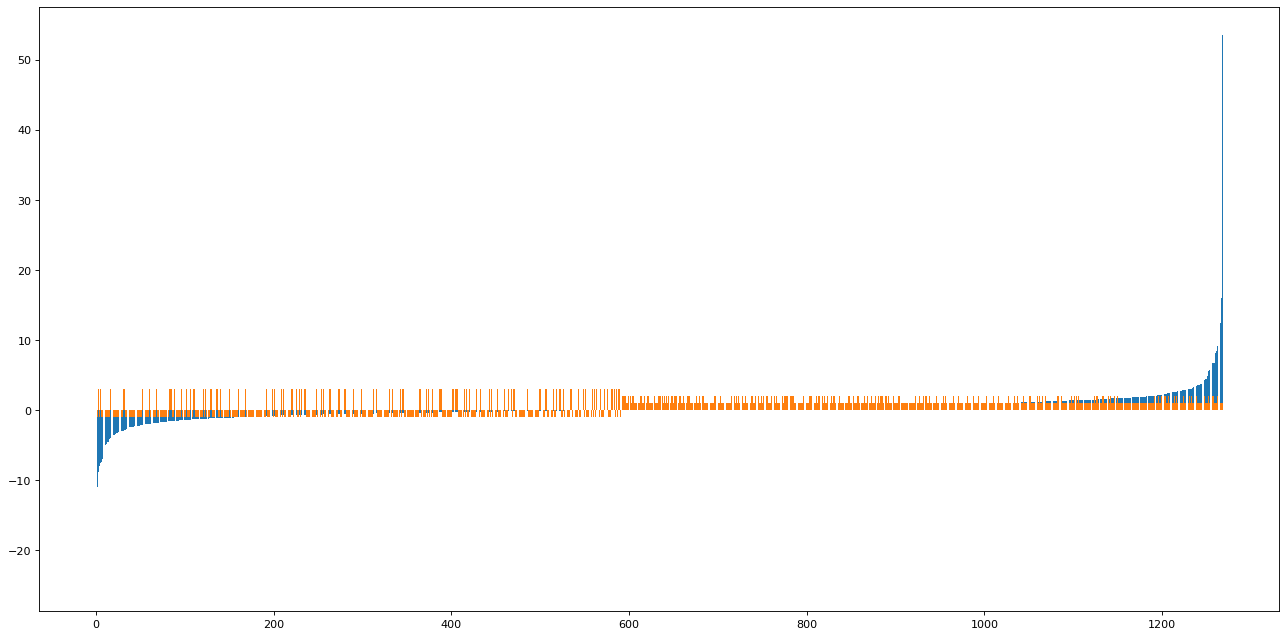

In [85]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#plt.bar(prd.index,prd['pHigh'])
plt.bar(prd.index,s['pdHigh'])
plt.bar(prd.index,s['pDir'])


In [91]:
f=s.copy().query('pHighDiff > 1 and pDir==1').sort_values(['pHighDiff','pLowDiff']).reset_index(drop=True) #and pDir==1 and Low>5 and NI>0'
print('pdHigh filtered: ',len(f))

pdHigh filtered:  77


<BarContainer object of 77 artists>

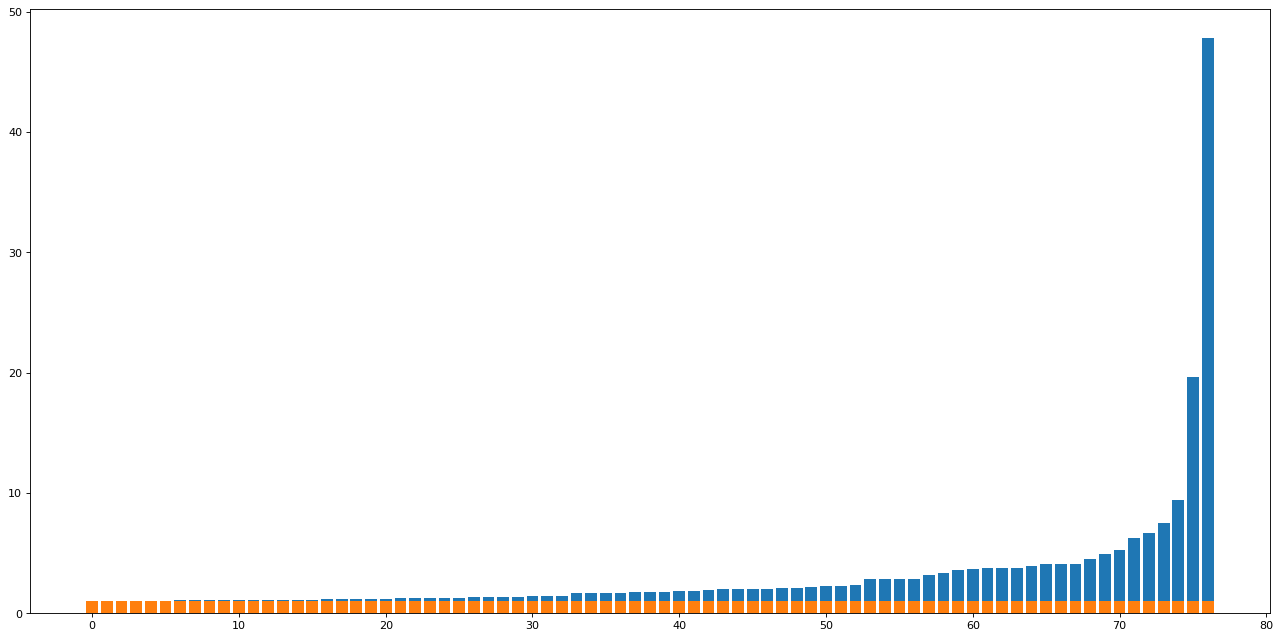

In [92]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(f.index,f['pHighDiff'])
plt.bar(f.index,f['pDir'])

In [93]:

#df = pdr.get_data_tiingo(f['Symbol'], start=dt.datetime.now()-timedelta(30), end=dt.datetime.now(), api_key=apikey)
#df['profit']=(df.close-df.open)
#df['rvol'] = df.volume/df.volume.rolling(8).mean()
#dftail = df.groupby(level='symbol').tail(1).copy()
#print(len(dftail))
#dfq= dftail.query('rvol > 0.8')
#print ('rvol filtered: ',len(dfq))
#print (dfq.profit.sum()/len(dfq))
#print(dfq.reset_index().symbol.tolist())


In [94]:
#goodboys.remove('ATGFF')
s1=f.query('Symbol in @goodboys')
print('goodboys filtered: ',len(s1))

goodboys filtered:  20


<BarContainer object of 20 artists>

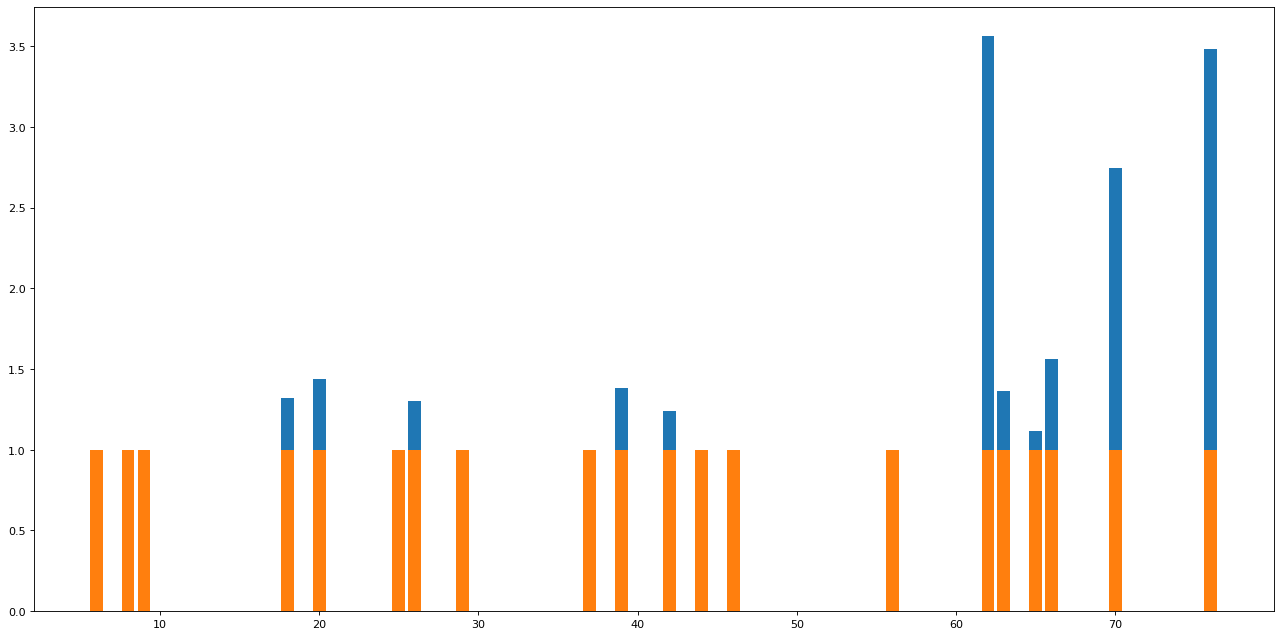

In [95]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(s1.index,s1['pdHigh'])
plt.bar(s1.index,s1['pDir'])

In [96]:
invest = 25000
s=s1.copy()
posvalue = invest/len(s)
s.loc[:,'posvalue'] = posvalue
s.loc[:,'alloc'] = (s.posvalue/(s.Close*0.25)).astype(int)
print ('STK to buy: ',s.alloc.sum())
s['Symbol'] = s.Symbol#+'n'

trade = {}
trade['symbols'] = list(s['Symbol'])
trade['alloc'] = list(s['alloc'])
trade['pt'] = list(s['pHigh'])
trade['sl'] = list(s['pLow'])

print(len(trade['symbols']))
s

STK to buy:  562
20


,Symbol,NI,volTrend,pDir,%Gain,pHigh,pdHigh,High,pLow,Low,Volume,Close,pHighDiff,pLowDiff,posvalue,alloc
6,ZLAB,-1,-1,1,2.268618,177.468903,0.600249,176.410004,171.388885,168.009995,269500,175.360001,1.058899,3.378891,1250.0,28
8,AIZ,-1,1,1,0.439848,124.957230,0.867540,123.882500,121.991386,121.550003,817200,123.309998,1.074730,0.441383,1250.0,40
9,ODFL,1,1,1,1.817841,217.909775,0.495662,216.835007,213.412476,213.029999,634900,215.639999,1.074768,0.382477,1250.0,23
18,ARWR,1,-1,1,3.527646,91.591766,1.318324,90.400002,87.430527,86.063499,679100,89.510002,1.191765,1.367027,1250.0,55
20,CZR,1,1,1,4.907288,85.078735,1.441198,83.870003,80.891907,79.394997,2026000,83.160004,1.208733,1.496910,1250.0,60
25,RARE,1,1,1,3.594405,151.224976,0.836817,149.970001,145.797226,143.839996,656900,148.139999,1.254974,1.957230,1250.0,33
26,DVA,-1,-1,1,1.947660,103.669388,1.298995,102.339996,100.669624,99.500000,1061200,102.070000,1.329391,1.169624,1250.0,48
29,CP,1,1,1,2.283344,370.169952,0.371465,368.799988,362.979950,361.369995,246200,367.769989,1.369965,1.609955,1250.0,13
37,MOH,1,1,1,2.184073,223.495056,0.784673,221.755005,219.513397,216.029999,381500,220.830002,1.740051,3.483398,1250.0,22
39,CREE,1,1,1,7.978726,128.585724,1.384311,126.830002,123.853073,118.820000,1952400,125.860001,1.755722,5.033073,1250.0,39


In [99]:
import requests
import datetime
import json
url='http://136.244.94.36:3000/predict1d/?header='+'predict1d'+'&date='+str(datetime.datetime.now())+'&text='+json.dumps(trade)
print(url)
response = requests.get(url)
print(response)

http://136.244.94.36:3000/predict1d/?header=predict1d&date=2021-03-12 13:57:06.291385&text={"symbols": ["ZLAB", "AIZ", "ODFL", "ARWR", "CZR", "RARE", "DVA", "CP", "MOH", "CREE", "CBRL", "ICLR", "MTD", "BGNE", "LDOS", "WDAY", "SPOT", "TEAM", "NVCR", "CNSWF"], "alloc": [28, 40, 23, 55, 60, 33, 48, 13, 22, 39, 32, 24, 4, 14, 48, 18, 13, 19, 26, 3], "pt": [177.46890258789062, 124.95722961425781, 217.90977478027344, 91.59176635742188, 85.0787353515625, 151.2249755859375, 103.66938781738281, 370.1699523925781, 223.49505615234375, 128.58572387695312, 156.5763397216797, 210.74884033203125, 1180.1412353515625, 354.76629638671875, 109.20653533935547, 280.9014587402344, 370.08270263671875, 266.5024108886719, 195.3956298828125, 1420.9410400390625], "sl": [171.38888549804688, 121.99138641357422, 213.4124755859375, 87.43052673339844, 80.89190673828125, 145.79722595214844, 100.66962432861328, 362.9799499511719, 219.51339721679688, 123.85307312011719, 152.0985107421875, 203.9423370361328, 1159.0324707

In [45]:
#df[["close","alma","sma"]].plot(figsize=(30,10),title="Comparison of SMA(9) vs ALMA(9)")

In [13]:
import datetime

x = datetime.datetime.now()
print(x)

2021-02-16 12:59:00.255345


In [14]:
import pytz
d1 = datetime.datetime(2020, 5, 13, 22, 50, 55) 
timezone = pytz.timezone('America/New_York')
timezone_date_time_obj = timezone.localize(d1)
timezone_date_time_obj

datetime.datetime(2020, 5, 13, 22, 50, 55, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)